<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

df = pd.read_csv('data/human_body_temperature.csv')

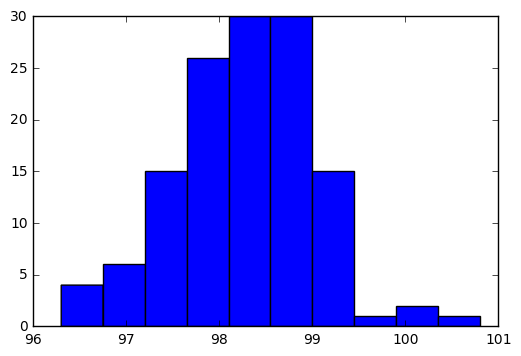

In [10]:
#1

plt.hist(df.temperature)
plt.show()

In [27]:
#The distribution of body temperatures is not quite normal because it does not have a bell-curve shaped distribution.

#It looks unimodal (one peak) and somewhat symmetric, but not quite. A check can be made on where the 1st, 2nd and 3rd 
#standard deviations are in order to see if these follow a normal distribution.

#(Wikipedia) In statistics, the 68–95–99.7 rule is a shorthand used to remember the percentage of values that lie 
# within a band around the mean in a normal distribution with a width of two, four and six standard deviations, 
# respectively; more accurately, 68.27%, 95.45% and 99.73% of the values lie within one, two and three standard 
# deviations of the mean, respectively. 

df_temp_mean = np.mean(df.temperature)
df_temp_stddev = np.std(df.temperature) 
temp = df.temperature.values

print('Proportion of data within one standard deviation of mean:', len(temp[(temp>df_temp_mean-df_temp_stddev) & (temp<df_temp_mean+df_temp_stddev)])/len(temp))
print('Proportion of data within two standard deviations of mean:', len(temp[(temp>df_temp_mean-2*df_temp_stddev) & (temp<df_temp_mean+2*df_temp_stddev)])/len(temp))
print('Proportion of data within three standard deviations of mean:', len(temp[(temp>df_temp_mean-3*df_temp_stddev) & (temp<df_temp_mean+3*df_temp_stddev)])/len(temp))    

print df_temp_mean
print df_temp_stddev

('Proportion of data within one standard deviation of mean:', 0)
('Proportion of data within two standard deviations of mean:', 0)
('Proportion of data within three standard deviations of mean:', 0)
98.2492307692
0.730357778905


In [ ]:
#PRINT OUT? Based on these values, sample distribition closely follows 68–95–99.7 rule. 
#Therefore, we can say that the distribution of body temperatures follows a normal distribution.

In [ ]:
#Is this included to set up sample data assumptions???
#Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the 
#population may also be normally distributed if we assume that this sample is representative of the population.

In [22]:
#2

df.shape

#There are 130 observations. This is a large sample size since it is >30 
#samples, which is considered a small sample set.

#The observations are independent since the occurrence of one event does not 
#change the probability of another.???


(130, 3)

In [25]:
#3

#Due to determining that the sample size distribution is normal, we can start using the z- and t test statistics. 
#Now we need to define the null hypothesis and the alternative hypotheses.

# Null Hypothesis: The true population temperature is 98.6 F.
# Alternative Hypothesis: The true population temperature is not 98.6 F.
# And we will set the significance level at 0.05.

#I would use a two-sample test in order to test for the temperature being less than or greater than 98.6. 
#???If I chose a one-tail test then I would fail to test for the possibility of less than/greater than degrees from 98.6 degrees F.

#In this situation, it is appropriate to use the z-statistic (sample size = 130) 
#since t-statistic is for smaller sample sizes (>30).

from statsmodels.stats.weightstats import ztest
ztest(df.temperature, value = 98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

In [ ]:
#Based on this output, we can see that the second value in the tuple, is the p-value.

# It is extremely small compared to our significance value of 0.05. 
# Given, there is strong evidence against the null Hypothesis,
# which is the true population temp is 98.6 degrees F. 
# Therefore, we accept the alternative Hypothesis,
# which states that the true population temp is not 98.6 degrees F.

In [26]:
#Now using the other test, the t-test. Let us see if the result is different
#even though the conditions for it to be used does not fit our situation.(???)

st.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [ ]:
#The output from the t-test, even though a different value,
#is an extremeley low p-value as well. 
#This is due to the denominator value in this test being different from the z-test.
#Thus, the null Hypothesis is rejected again. 

In [28]:
#4

#The temperature at which we should consider someone's temperature to be "abnormal":

#A 95% Confidence Interval will be used. This will determine what the critical value will be
#or the Z-value. For 95% Confidence Interval, the critical value is: 1.96.

#margin of error (me) =

#1.96 * Standard Error

#Standard Error (se) = standard deviation / (n)^0.5

#Reminder : standard deviation = 0.730357778905, n = 130

se = df_temp_stddev/np.sqrt(len(df.temperature))
me = 1.96*se
 

#confidence interval:

#Mean + me

CI = [df_temp_mean-me,df_temp_mean+me]
CI

[98.123679804428193, 98.374781734033363]

In [ ]:
#Given this interval, any temperature outside of this range is considered "abnormal".

In [42]:
#5

#Let us first see if we can assume normal distribution of data gender subsets
#based on the gender subsets before using z-stat/t-stat to help us answer the question. 

male_temp = np.array(df.temperature[df.gender == "M"])
female_temp = np.array(df.temperature[df.gender == "F"])

print (len(male_temp))
print (len(female_temp))

65
65


In [43]:
#65 is still large.
#So we can assume normal distribution again
#and proceed with computing a Z-stat.
#However, since the population standard deviation is unknown,
#we will proceed with using the t-stat.

In [47]:
st.ttest_ind(female_temp,male_temp)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

In [ ]:
#Based on the p-value, how it is below are significance level of 0.05,
#the evidence is weak to accept the null Hypothesis.
#Therefore, we reject the null Hypothesis in favor of the alternative Hypothesis, 
#which is: There is a significant difference between males and females in 
#normal temperature.